<a href="https://colab.research.google.com/github/Vale-bio/Vale-bio/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

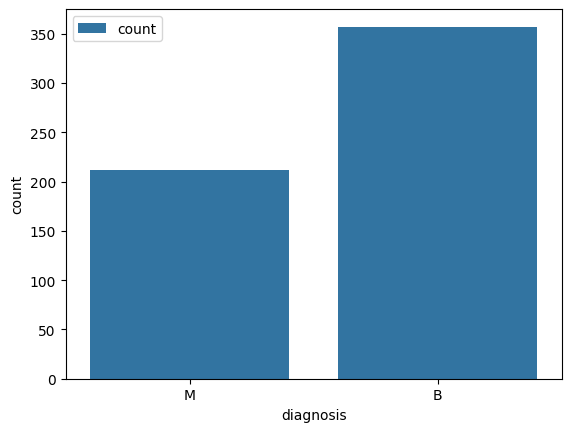

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#Carico il dataset
dataset_cancro = pd.read_csv("data.csv")

#print(dataset_cancro.info())
dataset_filtrato = dataset_cancro.drop(['id',"Unnamed: 32"], axis=1)

#Controllo se ci sono valori mancanti, nulli, duplicati

#print(dataset_cancro.isna().sum())
#print(dataset_cancro.isnull()).sum())
#print(dataset_cancro.duplicated().sum())

'''Inizio a separare il dataset, la variabile da predire
è la diagnosi'''

dataset_senza_diagnosi = dataset_filtrato.drop(['diagnosis'], axis=1)

#Standardizzo le variabili nella stessa unità di misura

scaler = StandardScaler()
valori_standard = scaler.fit_transform(dataset_senza_diagnosi)

#Converto il dataset iniziale nei valori standardizzati

df_standard = pd.DataFrame(valori_standard, columns=dataset_senza_diagnosi.columns)
diagnosi = dataset_filtrato.diagnosis #le variabili da predire

#Esploro i dati
numero_maligni_benigni = sns.countplot(x=diagnosi, label = 'count') #Il numero di tumori benigni supera il numero di tumori maligni
colonne = list(df_standard.columns)
plt.show()








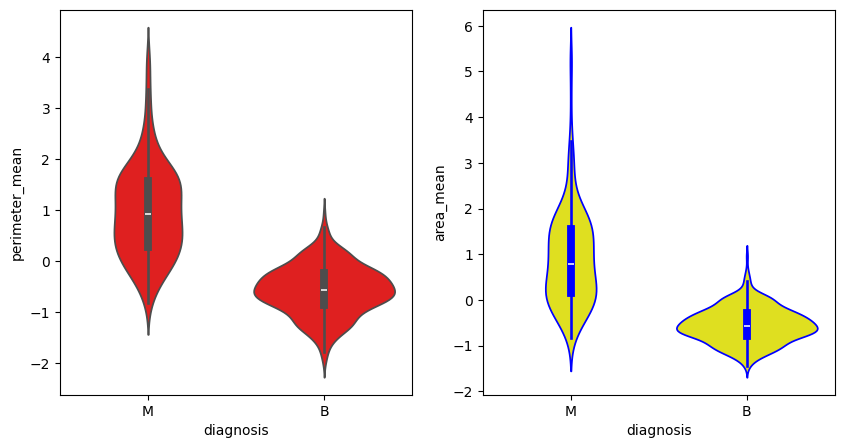

In [12]:
#Faccio due grafici per mettere a confronto perimetro e area nei tumori maligni e benigni
plt.figure(figsize=(10,5))
sub1, sub2 = plt.subplot(1,2,1), plt.subplot(1,2,2)
sns.violinplot(x=diagnosi, y = df_standard['perimeter_mean'], data=dataset_senza_diagnosi, ax=sub1, color='red')
sns.violinplot(x=diagnosi, y = df_standard['area_mean'], data=dataset_senza_diagnosi, color = 'yellow')
plt.show() #Perimetro e area hanno lo stesso andamento, i benigni tendono ad essere più piccoli nei maligni, come ci si aspetta.
